In [225]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


In [226]:
df = pd.read_csv("../data/steamWithIds-200k.csv")
play = df.loc[(df['playerGameStatus']=='play')].drop(columns = ["zero", "playerGameStatus","Unnamed: 0"])
play = play[play['time'] > 1]
play

,playerId,gameTitle,time,gameId
1,151603712,The Elder Scrolls V: Skyrim,273.0,72850.0
3,151603712,Fallout 4,87.0,377160.0
5,151603712,Fallout: New Vegas,12.1,22380.0
7,151603712,Left 4 Dead 2,8.9,550.0
9,151603712,HuniePop,8.5,339800.0
...,...,...,...,...
142305,128470551,Rogue Legacy,2.6,241600.0
142307,128470551,Magic Duels,2.2,316010.0
142309,128470551,Titan Souls,1.5,297130.0
142311,128470551,Grand Theft Auto Vice City,1.5,12110.0


In [227]:
game_info = play.groupby('gameTitle').agg(['mean', 'count']).drop(columns = [('gameId',  'mean'), ('gameId',  'count'),
                                                                             ('playerId',  'mean'), ('playerId',  'count')])

In [228]:
game_info = game_info.sort_values(by=[('time',  'count')], ascending=False)
game_info

time      
                                       mean count
gameTitle                                        
Dota 2                           261.635547  3750
Team Fortress 2                  101.437566  1709
Counter-Strike Global Offensive  245.426844  1315
Unturned                          20.497176   779
Left 4 Dead 2                     46.728969   718
...                                     ...   ...
Paint the Town Red                 2.100000     1
Panzer Corps                       5.900000     1
Panzer Tactics HD                 11.400000     1
Paper Sorcerer                     1.600000     1
10 Second Ninja                    5.400000     1

[2133 rows x 2 columns]

Text(0, 0.5, 'Number of players')

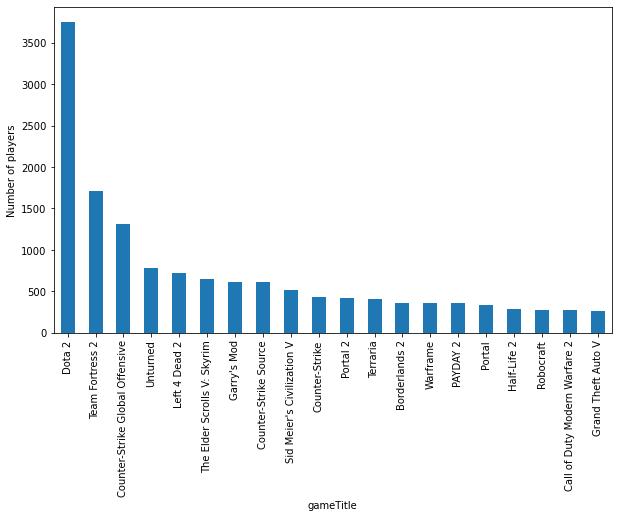

In [229]:
game_plot = game_info[0:20]
ax = game_plot.plot.bar(y=('time',  'count'), figsize = (10,6),rot=90, legend=False)
ax.set_ylabel("Number of players")

Text(0, 0.5, 'Mean time played (h)')

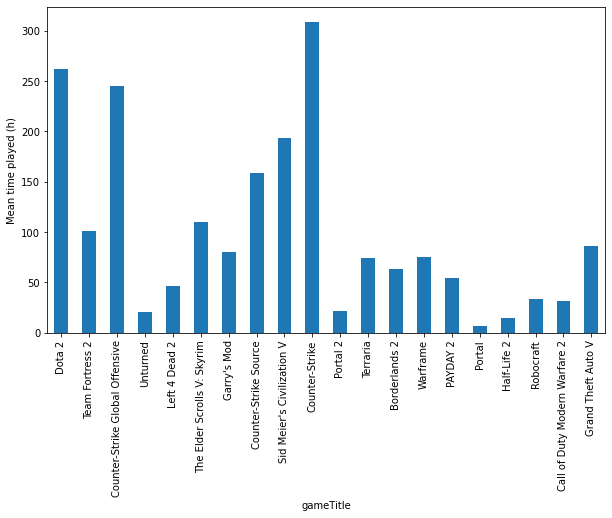

In [230]:
ax = game_plot.plot.bar(y=('time',  'mean'), figsize = (10,6),rot=90, legend=False)
ax.set_ylabel("Mean time played (h)")

In [231]:
#only want to look at games that have been played more than 4 times
game_info = game_info[game_info[('time',  'count')] > 4]
played_games = game_info.index.tolist()

In [232]:
play

,playerId,gameTitle,time,gameId
1,151603712,The Elder Scrolls V: Skyrim,273.0,72850.0
3,151603712,Fallout 4,87.0,377160.0
5,151603712,Fallout: New Vegas,12.1,22380.0
7,151603712,Left 4 Dead 2,8.9,550.0
9,151603712,HuniePop,8.5,339800.0
...,...,...,...,...
142305,128470551,Rogue Legacy,2.6,241600.0
142307,128470551,Magic Duels,2.2,316010.0
142309,128470551,Titan Souls,1.5,297130.0
142311,128470551,Grand Theft Auto Vice City,1.5,12110.0


In [233]:
play = play[play['gameTitle'].isin(played_games)]
play

,playerId,gameTitle,time,gameId
1,151603712,The Elder Scrolls V: Skyrim,273.0,72850.0
3,151603712,Fallout 4,87.0,377160.0
5,151603712,Fallout: New Vegas,12.1,22380.0
7,151603712,Left 4 Dead 2,8.9,550.0
9,151603712,HuniePop,8.5,339800.0
...,...,...,...,...
142303,128470551,Torchlight II,2.9,200710.0
142305,128470551,Rogue Legacy,2.6,241600.0
142307,128470551,Magic Duels,2.2,316010.0
142311,128470551,Grand Theft Auto Vice City,1.5,12110.0


In [ ]:
# look at user info
game_info = play.groupby('playerId').agg(['mean', 'count']).drop(columns = [('gameId',  'mean'), ('gameId',  'count'),
                                                                             ('playerId',  'mean'), ('playerId',  'count')])

In [237]:
# function that for every user, game pair playtime looks at the game playtime distribution and assigns a score
def rating(game, nclass, play, user_time):
    user_time = np.log2(user_time)
    #print(user_time)
    #play = play[play['time'] > 1]
    game_df = play[play['gameTitle'] == game]
    game_df['log_time'] = np.log2(game_df['time'])

    max_time = game_df["log_time"].max()
    min_time = game_df["log_time"].min()


    #print(min_time)
    #print(max_time)
    em = np.arange(min_time, max_time, (max_time-min_time)/5)
    
    for score,i in enumerate(em):
        #score+=1

        if user_time < i:
            return(score)
            break
        if user_time > em[4]:
            score = 5
            return(score)
            break
        
        #print (score)
        #print(i)
    
    # depending on where the user falls we can say they have rated the game ... 
    #print(em)



In [238]:
aaa = rating("Unturned", 5, play, 70)
aaa

<ipython-input-237-0c093edc8881>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_time'] = np.log2(game_df['time'])


4

In [173]:
rating("Dota 2", 5, play,4)

<ipython-input-171-4df755bb3870>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_time'] = np.log2(game_df['time'])


1

In [239]:
play['rating'] = play.apply(lambda x: rating(x["gameTitle"], 5, play, x["time"]), axis = 1)

<ipython-input-239-cf0596e08dfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play['rating'] = play.apply(lambda x: rating(x["gameTitle"], 5, play, x["time"]), axis = 1)


In [241]:
play[0:20]

,playerId,gameTitle,time,gameId,rating
1,151603712,The Elder Scrolls V: Skyrim,273.0,72850.0,4
3,151603712,Fallout 4,87.0,377160.0,4
5,151603712,Fallout: New Vegas,12.1,22380.0,3
7,151603712,Left 4 Dead 2,8.9,550.0,2
9,151603712,HuniePop,8.5,339800.0,2
11,151603712,Path of Exile,8.1,238960.0,2
13,151603712,Poly Bridge,7.5,367450.0,4
15,151603712,Left 4 Dead,3.3,500.0,1
17,151603712,Team Fortress 2,2.8,440.0,1
19,151603712,Tomb Raider,2.5,203160.0,1


In [242]:
play.to_csv("ratings.csv")